# Exploration


In [11]:
import pandas as pd

# Read the data

df = pd.read_csv("data/Opportunites.csv", sep=";", encoding="ISO-8859-1")

# drop 7 last rows

df = df[:-7]

In [47]:
import pandas as pd
from src.data_cleaning.utils import to_binary_one_hot, to_one_hot

# Read the data

df = pd.read_csv("data/Opportunites.csv", sep=";", encoding="ISO-8859-1")

# drop 7 last rows

df = df[:-7]

# Drop double in 'N° Opportunité'

df = df.drop_duplicates(subset=["N° Opportunité"])

keep_cols = [
    "Montant",
    "Origine de l'opportunité",
    "Opération",
    "Domaine",
    "Position",
    "Type du compte",
    "Étape",
    "Date de dernière modification",
    "Activité",
    "Rôle du contact",
    "Resp.",
    "Resp..1",
]

binary_one_hot_cols = ["Opération", "Domaine", "Position"]

one_hot_cols = [
    "Origine de l'opportunité",
    "Type du compte",
    "Activité",
    "Rôle du contact",
]

df = df[keep_cols]

# 'Montant' to float

df["Montant"] = df["Montant"].str.replace(",", ".").astype(float)

# To one hot

df = to_binary_one_hot(df, binary_one_hot_cols)

df = to_one_hot(df, one_hot_cols)

# Drop NaN in 'Montant'

df = df.dropna(subset=["Montant"])

# Drop negative values in 'Montant'

df = df[df["Montant"] > 0]

df["Label"] = None

# if 'Étape' in ['6- Gagnée', '9- Gagnée archivée'] then 'Label' = 1
# If 'Étape' in ['7- Perdue', '8- Perdue archivée'] then 'Label' = 0

df.loc[df["Étape"].isin(["6- Gagnée", "9- Gagnée archivée"]), "Label"] = 1
df.loc[df["Étape"].isin(["7- Perdue", "8- Perdue archivée"]), "Label"] = 0

df["jours depuis dernière modification"] = (
    pd.to_datetime("today")
    - pd.to_datetime(df["Date de dernière modification"], format="%d/%m/%Y")
).dt.days

# if 'Label' is NaN and 'jours depuis dernière modification' > 2*365 then 'Label' = 0
df.loc[
    (df["Label"].isna()) & (df["jours depuis dernière modification"] > 2 * 365),
    "Label",
] = 0

# Drop NaN in 'Label'

df = df.dropna(subset=["Label"])

# Drop 'Étape', 'Date de dernière modification' and 'jours depuis dernière modification'

df = df.drop(
    [
        "Étape",
        "Date de dernière modification",
        "jours depuis dernière modification",
    ],
    axis=1,
)

# Clean 'Resp.' and 'Resp..1'

df.loc[(df["Resp..1"] == "LIL") & (df["Resp."] == "Julien MILLE"), "Resp..1"] = "MIL"

print(df.shape)

(39350, 93)


In [48]:
staff = pd.read_csv("data/Staff.csv", sep=";", encoding="ISO-8859-1")

staff = staff[staff["Identifiant"].isin(df["Resp..1"])]

keep_cols_staff = [
    "Identifiant",
    "fDateDeNaissance",
    "fDateEntree",
    "sDiplomeFinal",
    "sFicheDePoste",
]

staff = staff[keep_cols_staff]

one_hot_cols_staff = ["sDiplomeFinal", "sFicheDePoste"]

staff = to_one_hot(staff, one_hot_cols_staff)

staff["age"] = (
    pd.to_datetime("today")
    - pd.to_datetime(staff["fDateDeNaissance"], format="%d/%m/%Y")
).dt.days / 365

staff["anciennete"] = (
    pd.to_datetime("today") - pd.to_datetime(staff["fDateEntree"], format="%d/%m/%Y")
).dt.days / 365

staff = staff.drop(["fDateDeNaissance", "fDateEntree"], axis=1)


print(staff.shape)
print(staff.columns)
staff.head()

(128, 17)
Index(['Identifiant', 'sDiplomeFinal_DUT', 'sDiplomeFinal_IngÃ©nieur',
       'sDiplomeFinal_Licence', 'sDiplomeFinal_Master 1',
       'sDiplomeFinal_Master 2', 'sFicheDePoste_Directeur Commercial',
       'sFicheDePoste_Directeur Commercial France',
       'sFicheDePoste_Directeur DÃ©veloppement',
       'sFicheDePoste_Directeur d'Agence',
       'sFicheDePoste_Directeur de Travaux',
       'sFicheDePoste_IngÃ©nieur Commercial',
       'sFicheDePoste_IngÃ©nieur Commercial ConfirmÃ©',
       'sFicheDePoste_IngÃ©nieur Commercial Principal',
       'sFicheDePoste_IngÃ©nieur Travaux ConfirmÃ©', 'age', 'anciennete'],
      dtype='object')


Identifiant  sDiplomeFinal_DUT  sDiplomeFinal_IngÃ©nieur  \
21         AHY              False                     False   
47         ARL              False                     False   
48         ARR              False                      True   
60         AFR              False                      True   
79         BRB              False                     False   

    sDiplomeFinal_Licence  sDiplomeFinal_Master 1  sDiplomeFinal_Master 2  \
21                  False                   False                   False   
47                  False                   False                   False   
48                  False                   False                   False   
60                  False                   False                   False   
79                  False                   False                   False   

    sFicheDePoste_Directeur Commercial  \
21                               False   
47                               False   
48                               False   
60                               False   
79                               False   

    sFicheDePoste_Directeur Commercial France  \
21                                      False   
47                                      False   
48                                      False   
60                                      False   
79                                      False   

    sFicheDePoste_Directeur DÃ©veloppement  sFicheDePoste_Directeur d'Agence  \
21                                   False                             False   
47                                   False                             False   
48                                   False                             False   
60                                   False                             False   
79                                   False                             False   

    sFicheDePoste_Directeur de Travaux  sFicheDePoste_IngÃ©nieur Commercial  \
21                               False                                False   
47                               False                                False   
48                               False                                False   
60                               False                                False   
79                               False                                False   

    sFicheDePoste_IngÃ©nieur Commercial ConfirmÃ©  \
21                                          False   
47                                          False   
48                                           True   
60                                           True   
79                                          False   

    sFicheDePoste_IngÃ©nieur Commercial Principal  \
21                                          False   
47                                          False   
48                                          False   
60                                          False   
79                                          False   

    sFicheDePoste_IngÃ©nieur Travaux ConfirmÃ©        age  anciennete  
21                                       False  35.038356    9.789041  
47                                       False  36.706849   12.013699  
48                                       False  36.671233   10.230137  
60                                       False  32.290411    7.430137  
79                                       False  37.780822   14.890411

In [53]:
# Join df and staff on 'Resp..1' and 'Identifiant'

joint = df.join(staff.set_index("Identifiant"), on="Resp..1")

joint = joint.drop(["Resp..1", "Resp."], axis=1)

print(joint.shape)
for col in joint.columns:
    print(col)
joint.head()

(39350, 107)
Montant
Opération_Opération_NF
Domaine_Domaine_BT
Position_Position_DR
Origine de l'opportunité_Appel d'offre privé
Origine de l'opportunité_Appel d'offre public
Origine de l'opportunité_Chantier vu
Origine de l'opportunité_Consultation directe ancien Client
Origine de l'opportunité_Consultation directe nouveau Client
Origine de l'opportunité_Conversation
Origine de l'opportunité_Expertise
Origine de l'opportunité_SPPM
Type du compte_Entreprise BTP
Type du compte_Fournisseur
Type du compte_Maître d'Oeuvre
Type du compte_Maître d?Ouvrage
Type du compte_Prescripteur
Activité_ACEPA
Activité_ACRES
Activité_ACSTR
Activité_AMNFR
Activité_ANTCO
Activité_CPCRI
Activité_CPEPA
Activité_CPFEU
Activité_CPINJ
Activité_CPJOI
Activité_CPMIN
Activité_CPMIX
Activité_CPMOR
Activité_CPRES
Activité_CPRHC
Activité_CPSTR
Activité_CRCRI
Activité_CREPA
Activité_CRFEU
Activité_CRLAG
Activité_CRMIN
Activité_CRRES
Activité_CRSTF
Activité_CRSTR
Activité_EPEPA
Activité_EPEQP
Activité_EPMIN
Activité_EP

Montant  Opération_Opération_NF  Domaine_Domaine_BT  Position_Position_DR  \
1    5300.0                    True                True                 False   
2    6860.0                    True                True                 False   
3    4788.0                    True                True                 False   
4    7500.0                    True                True                  True   
5  545000.0                   False                True                  True   

   Origine de l'opportunité_Appel d'offre privé  \
1                                         False   
2                                         False   
3                                         False   
4                                         False   
5                                         False   

   Origine de l'opportunité_Appel d'offre public  \
1                                          False   
2                                          False   
3                                          False   
4                                          False   
5                                          False   

   Origine de l'opportunité_Chantier vu  \
1                                 False   
2                                 False   
3                                 False   
4                                 False   
5                                 False   

   Origine de l'opportunité_Consultation directe ancien Client  \
1                                               True             
2                                               True             
3                                              False             
4                                               True             
5                                              False             

   Origine de l'opportunité_Consultation directe nouveau Client  \
1                                              False              
2                                              False              
3                                               True              
4                                              False              
5                                               True              

   Origine de l'opportunité_Conversation  ...  \
1                                  False  ...   
2                                  False  ...   
3                                  False  ...   
4                                  False  ...   
5                                  False  ...   

   sFicheDePoste_Directeur Commercial France  \
1                                      False   
2                                      False   
3                                      False   
4                                      False   
5                                      False   

   sFicheDePoste_Directeur DÃ©veloppement  sFicheDePoste_Directeur d'Agence  \
1                                   False                             False   
2                                   False                             False   
3                                   False                             False   
4                                   False                             False   
5                                   False                             False   

   sFicheDePoste_Directeur de Travaux  sFicheDePoste_IngÃ©nieur Commercial  \
1                               False                                False   
2                               False                                False   
3                               False                                False   
4                               False                                False   
5                               False                                False   

   sFicheDePoste_IngÃ©nieur Commercial ConfirmÃ©  \
1                                          False   
2                                           True   
3                                           True   
4                                          False   
5                                          False  

# Strategy


- Que faire des doubles dans la colonne N° Opportunité ?
- Pourquoi y a-t-il toujours une date de cloture ? Est-ce une date estimée ?
- Dans la colonne 'Nom du compte', il y a en champ 'DOUBLON NE PAS UTILISER'. Est-ce une indication pour moi ?
- Ai-je le droit d'utiliser les informations sur les employés dans l'algorithme ? Les noms et prénoms des clients ?

- Comment catégoriser 'Étape' ?
  0- Etude amont / Budget 2430
  1- Priorisation 27
  2- Dépôt de candidature 30
  3- Réponse en préparation 1316
  4- Réponse envoyée 8565
  5- Négociation prix 286
  6- Gagnée 19978
  7- Perdue 21379
  8- Perdue archivée 8226
  9- Gagnée archivée 1620


Plan:

- Drop double in 'N° Opportunité' (63857 to 46185 rows)
- Drop 'N° Opportunité' (clef)
- Drop 'Nom de l'opportunité' (clef, analyse plus tard?)
- Drop 'Date de clôture' (information tirée du futur)
- Drop 'Date de création' et 'Date de dernière modification'
- Drop 'Date de démarrage estimé de l'affaire' (58161 Nan over 63864)
- Drop 'Durée estimée du chantier (nb mois)' (61167 Nan over 63864)
- Convert 'Montant' to float
- Drop rows where 'Montant' is Nan
- Drop 'Probabilité (%)'
- Drop 'Nom du compte' (Texte complexe)
- One hot 'Activité' (56 valeurs différentes)
- Drop 'Resp.' (135 employés différents) et 'Resp..1' (136 valeurs ?)
- Drop 'Prénom' and 'Nom'
- Drop 'Rôle du contact' (18 valeurs différentes, moitié de Nan)
- Drop 'Motif si perdue' (information tirée du futur)
- One hot 'Origine de l'opportunité' (8 valeurs différentes)
- Drop 'Locaux' (32 valeurs différentes)
- One hot 'Opération' (2 valeurs)
- One hot 'Domaine' (2 valeurs)
- One hot 'Position' (2 valeurs)
- One hot 'Type du compte' (6 valeurs dont 442 Nan)
- A voir pour 'Étape'
- Drop 'Ville' (7142 villes différentes)

- Import Staff
- One hot 'sDiplomeFinal' (6 valeurs)
- One hot 'sFicheDePoste' (10 valeurs)
- Create 'Age'
- Create 'Anciennete'
- Join table Staff
- Drop 'Resp.' and 'Resp..1'

Futur:

- Travailler sur 'Locaux'
- Travailler sur 'Ville' (Ajouter des données géographiques, densité, prix au m^2, population, etc.)
- Travailler sur 'Nom du compte' ("Ville, entreprise, taille de l'entreprise, etc)
- Ajouter stats de l'employé, stats de l'entreprise


(128, 17)
Index(['Identifiant', 'sDiplomeFinal_DUT', 'sDiplomeFinal_IngÃ©nieur',
       'sDiplomeFinal_Licence', 'sDiplomeFinal_Master 1',
       'sDiplomeFinal_Master 2', 'sFicheDePoste_Directeur Commercial',
       'sFicheDePoste_Directeur Commercial France',
       'sFicheDePoste_Directeur DÃ©veloppement',
       'sFicheDePoste_Directeur d'Agence',
       'sFicheDePoste_Directeur de Travaux',
       'sFicheDePoste_IngÃ©nieur Commercial',
       'sFicheDePoste_IngÃ©nieur Commercial ConfirmÃ©',
       'sFicheDePoste_IngÃ©nieur Commercial Principal',
       'sFicheDePoste_IngÃ©nieur Travaux ConfirmÃ©', 'age', 'anciennete'],
      dtype='object')


Identifiant  sDiplomeFinal_DUT  sDiplomeFinal_IngÃ©nieur  \
21         AHY              False                     False   
47         ARL              False                     False   
48         ARR              False                      True   
60         AFR              False                      True   
79         BRB              False                     False   

    sDiplomeFinal_Licence  sDiplomeFinal_Master 1  sDiplomeFinal_Master 2  \
21                  False                   False                   False   
47                  False                   False                   False   
48                  False                   False                   False   
60                  False                   False                   False   
79                  False                   False                   False   

    sFicheDePoste_Directeur Commercial  \
21                               False   
47                               False   
48                               False   
60                               False   
79                               False   

    sFicheDePoste_Directeur Commercial France  \
21                                      False   
47                                      False   
48                                      False   
60                                      False   
79                                      False   

    sFicheDePoste_Directeur DÃ©veloppement  sFicheDePoste_Directeur d'Agence  \
21                                   False                             False   
47                                   False                             False   
48                                   False                             False   
60                                   False                             False   
79                                   False                             False   

    sFicheDePoste_Directeur de Travaux  sFicheDePoste_IngÃ©nieur Commercial  \
21                               False                                False   
47                               False                                False   
48                               False                                False   
60                               False                                False   
79                               False                                False   

    sFicheDePoste_IngÃ©nieur Commercial ConfirmÃ©  \
21                                          False   
47                                          False   
48                                           True   
60                                           True   
79                                          False   

    sFicheDePoste_IngÃ©nieur Commercial Principal  \
21                                          False   
47                                          False   
48                                          False   
60                                          False   
79                                          False   

    sFicheDePoste_IngÃ©nieur Travaux ConfirmÃ©        age  anciennete  
21                                       False  35.038356    9.789041  
47                                       False  36.706849   12.013699  
48                                       False  36.671233   10.230137  
60                                       False  32.290411    7.430137  
79                                       False  37.780822   14.890411

In [37]:
from src.data_cleaning.utils import unique_values, count_values, count_nan

col = "fDateDeNaissance"

unique = unique_values(staff, col)
values_count = count_values(staff, col)

print(unique.shape)
print(unique)
print(values_count)
print(count_nan(staff, col))

(128,)
['14/07/1988' '13/11/1986' '26/11/1986' '13/04/1991' '17/10/1985'
 '25/02/1991' '15/08/1988' '01/09/1973' '24/03/1988' '24/09/1982'
 '07/12/1953' '01/06/1978' '06/03/1958' '19/01/1982' '19/10/1982'
 '12/03/1982' '03/04/1975' '18/12/1989' '18/07/1988' '21/06/1983'
 '25/10/1950' '20/06/1959' '28/08/1985' '10/08/1986' '04/05/1991'
 '10/03/1986' '06/04/1951' '07/09/1991' '23/12/1993' '29/04/1971'
 '30/12/1987' '06/07/1987' '19/10/1972' '04/07/1990' '26/03/1986'
 '14/05/1987' '29/10/1987' '29/07/1963' '07/12/1990' '07/05/1986'
 '21/07/1987' '18/09/1982' '03/04/1986' '04/05/1990' '20/11/1991'
 '01/12/1983' '10/04/1984' '04/11/1992' '14/03/1980' '04/07/1989'
 '15/06/1991' '17/04/1989' '14/04/1988' '22/02/1986' '06/04/1985'
 '28/04/1988' '19/08/1982' '31/01/1984' '30/05/1986' '19/06/1988'
 '20/06/1965' '22/10/1960' '10/10/1992' '29/11/1971' '24/10/1990'
 '27/09/1977' '12/08/1984' '25/10/1989' '31/08/1985' '22/06/1991'
 '05/02/1989' '30/12/1992' '17/10/1982' '18/09/1980' '02/03/1993'
 '2

In [31]:
# Keep only rows where 'Identifiant' is in 'Resp..1'

(128, 11)
(128,)
(0,)


In [19]:
print(df.shape)
print(df.columns)
# df.head()

(63857, 25)
Index(['N° Opportunité', 'Nom de l'opportunité', 'Date de clôture',
       'Date de création', 'Date de dernière modification',
       'Date de démarrage estimé de l'affaire',
       'Durée estimée du chantier (nb mois)', 'Montant', 'Probabilité (%)',
       'Nom du compte', 'Activité', 'Resp.', 'Prénom', 'Nom',
       'Rôle du contact', 'Motif si perdue', 'Origine de l'opportunité',
       'Locaux', 'Opération', 'Domaine', 'Position', 'Resp..1',
       'Type du compte', 'Étape', 'Ville'],
      dtype='object')


In [4]:
from src.data_cleaning.utils import unique_values, count_values, count_nan

col = "Étape"

unique = unique_values(df, col)
values_count = count_values(df, col)

print(unique.shape)
print(unique)
print(values_count)
print(count_nan(df, col))

(10,)
['4- Réponse envoyée' '7- Perdue' '8- Perdue archivée' '6- Gagnée'
 '9- Gagnée archivée' '0- Etude amont / Budget'
 '3- Réponse en préparation' '5- Négociation prix' '1- Priorisation'
 '2- Dépôt de candidature']
Étape
6- Gagnée                    19897
7- Perdue                    19683
4- Réponse envoyée            8405
8- Perdue archivée            7216
0- Etude amont / Budget       1737
9- Gagnée archivée            1611
5- Négociation prix            286
3- Réponse en préparation      213
1- Priorisation                 15
2- Dépôt de candidature         12
Name: count, dtype: int64
0


# Processing


In [1]:
import pandas as pd
from data_cleaning.controller import load_opportunities

# Visualization


In [14]:
# Plot PCA of data with labels on plotly
import pandas as pd
import numpy as np
from scipy import stats

df = load_opportunities()
labels = df["Label"]
df = df.drop("Label", axis=1)

filter_mask = np.abs(stats.zscore(df["Montant"])) < 3
df = df[filter_mask]
labels = labels[filter_mask]

# Normalize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_df = scaler.fit_transform(df)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(normalized_df)

df_pca = pca.transform(normalized_df)

import plotly.express as px

fig = px.scatter(
    x=df_pca[:, 0],
    y=df_pca[:, 1],
    color=labels,
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.show()

In [15]:
# print PCA vectors

print(pca.components_)
print(pca.explained_variance_ratio_)

print(df.columns)

[[ 0.08406883 -0.37758787 -0.04083861  0.44119215  0.07911743  0.27167214
  -0.00080015 -0.335504    0.0926556   0.05427986  0.08882525  0.00335619
  -0.47983971  0.00256573  0.05564902  0.45650663  0.01523919]
 [-0.26738839  0.0855204   0.35098326  0.01109356 -0.01167577 -0.29437167
   0.02031563 -0.36232348  0.61744027  0.0959728   0.18033227  0.01475926
  -0.001143    0.04568845  0.34023797 -0.16668329  0.10286208]]
[0.21305346 0.08582534]
Index(['Montant', 'Opération_Opération_NF', 'Domaine_Domaine_BT',
       'Position_Position_DR', 'Origine de l'opportunité_Appel d'offre privé',
       'Origine de l'opportunité_Appel d'offre public',
       'Origine de l'opportunité_Chantier vu',
       'Origine de l'opportunité_Consultation directe ancien Client',
       'Origine de l'opportunité_Consultation directe nouveau Client',
       'Origine de l'opportunité_Conversation',
       'Origine de l'opportunité_Expertise', 'Origine de l'opportunité_SPPM',
       'Type du compte_Entreprise BTP'

In [2]:
# Plot TSNE of data with labels on plotly

import pandas as pd
import numpy as np
from scipy import stats

df = load_opportunities()
labels = df["Label"]
df = df.drop("Label", axis=1)

filter_mask = np.abs(stats.zscore(df["Montant"])) < 3
df = df[filter_mask]
labels = labels[filter_mask]

# Normalize data

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# normalized_df = scaler.fit_transform(df)

from sklearn.manifold import TSNE


tsne = TSNE(n_components=2)

df_tsne = tsne.fit_transform(df)

import plotly.express as px

fig = px.scatter(
    x=df_tsne[:, 0],
    y=df_tsne[:, 1],
    color=labels,
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.show()

In [38]:
# Plot correlation between labels and each feature

import pandas as pd
import numpy as np
from scipy import stats

df = load_opportunities()
labels = df["Label"]
df = df.drop("Label", axis=1)

filter_mask = np.abs(stats.zscore(df["Montant"])) < 3
df = df[filter_mask]
labels = labels[filter_mask]

# Plot correlation between labels and each feature

from sklearn.feature_selection import r_regression


correlations = r_regression(df.astype(float), labels.values.astype(float))

print(correlations)

import plotly.express as px

fig = px.bar(
    x=df.columns,
    y=correlations,
    color=correlations,
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.show()

[-0.04638921 -0.05189914  0.03434482  0.04846397 -0.00222875 -0.00867171
  0.0035939   0.00757615 -0.03596933  0.01871626  0.06298126  0.00068448
 -0.06081425 -0.00802313 -0.05500763  0.08967181 -0.00640394]


# Algorithm


In [67]:
# dataset import and split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# df = load_opportunities()

df = joint

labels = df["Label"].astype(bool)
features = df.drop("Label", axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

In [61]:
# train logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.6452033036848793
0.6449809402795426


0.7450444726810673
0.6940279542566709


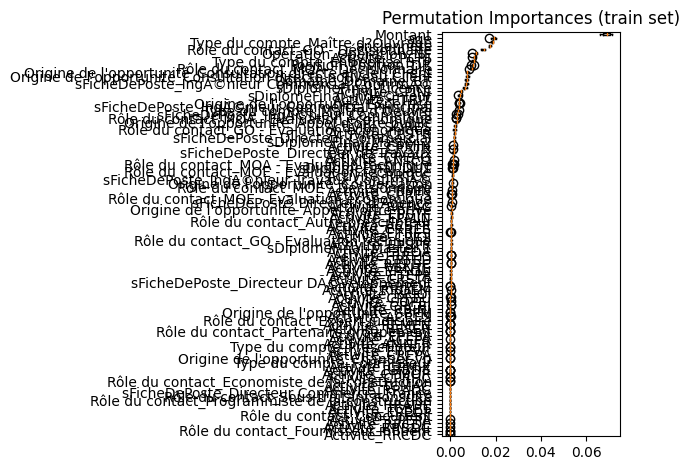

In [73]:
# train random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf = RandomForestClassifier(max_depth=15, random_state=0).fit(X_train, y_train)

print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

# Explain random forest

from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

import matplotlib.pyplot as plt

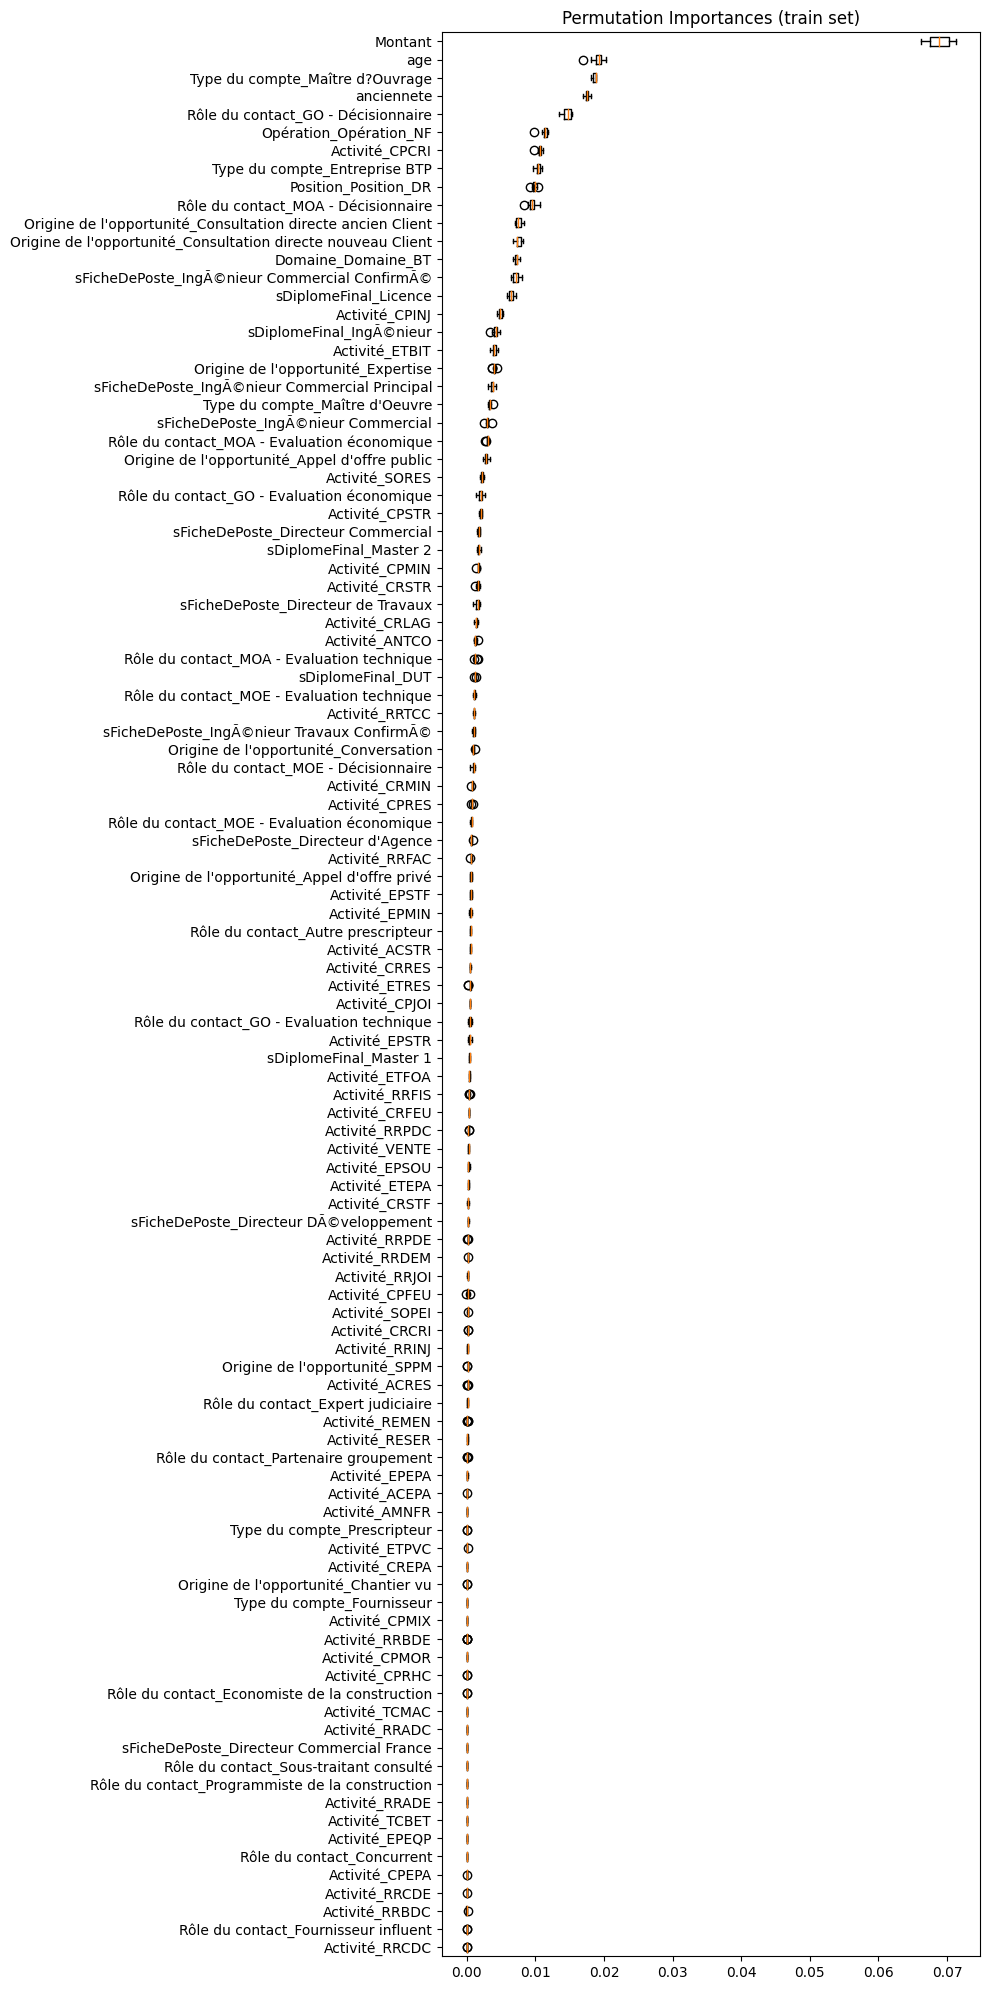

In [78]:
fig, ax = plt.subplots(figsize=(10, 20))

ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [69]:
# train xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score

clf = xgb.XGBClassifier().fit(X_train, y_train)

print(accuracy_score(y_train, clf.predict(X_train)))

print(accuracy_score(y_test, clf.predict(X_test)))

0.7623888182973316
0.6961880559085133


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

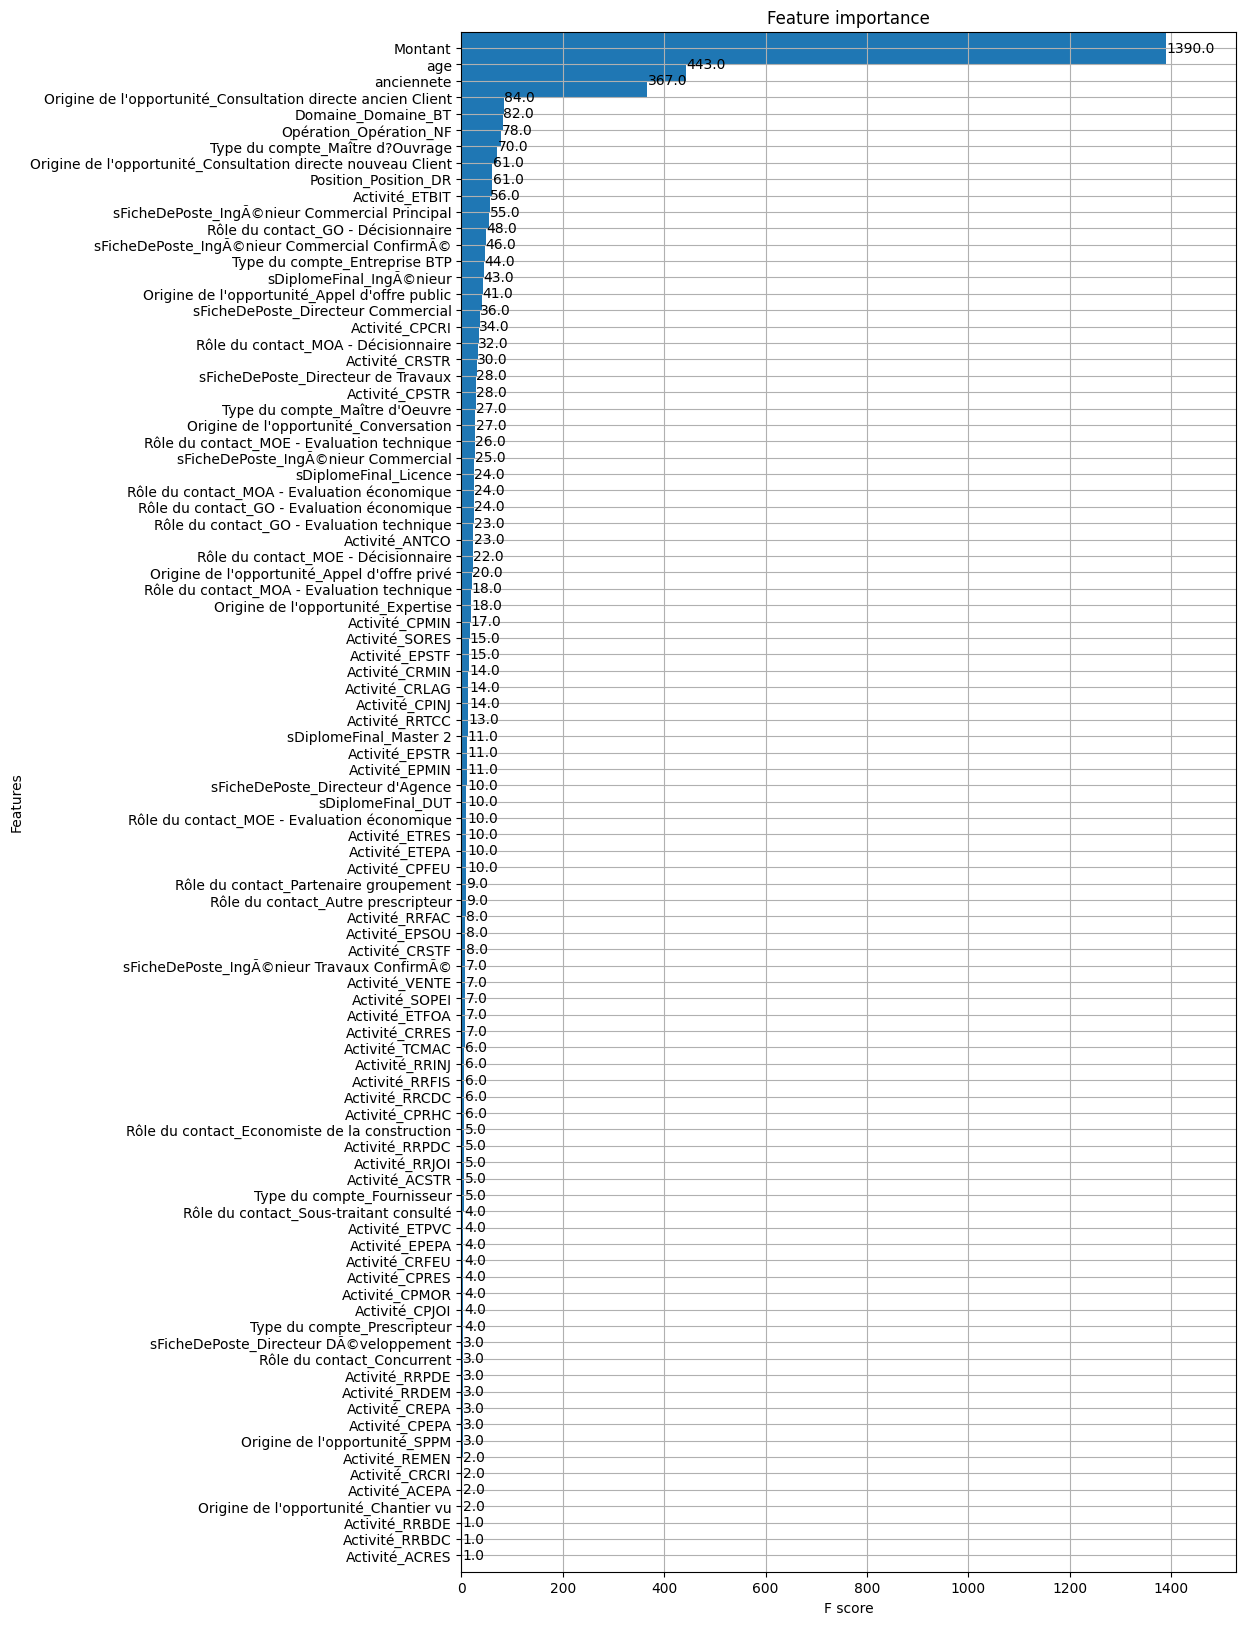

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))

xgb.plot_importance(clf, ax=ax, height=2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 11169, number of negative: 20311
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 31480, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354797 -> initscore=-0.598021
[LightGBM] [Info] Start training from score -0.598021
0.7266518424396442
0.691740787801779


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

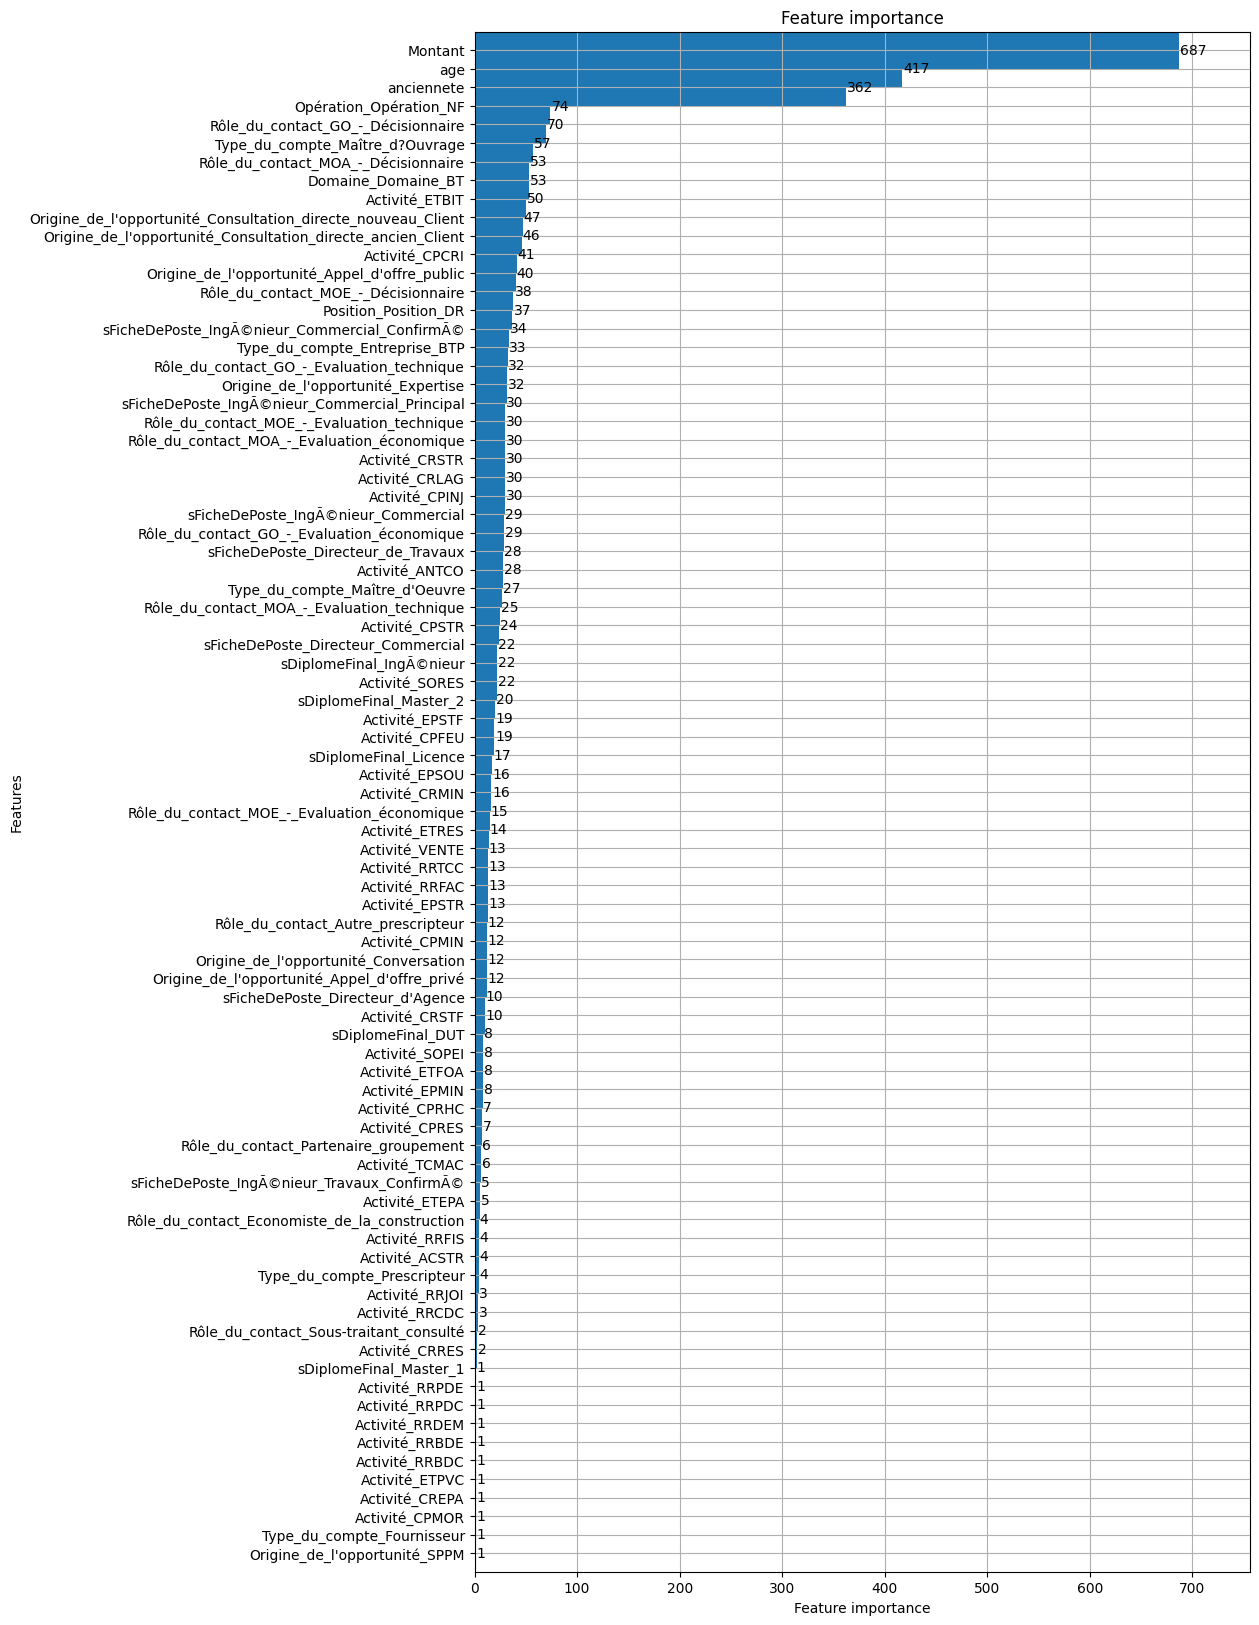

In [71]:
# train lightgbm

import lightgbm as lgb
from sklearn.metrics import accuracy_score

clf = lgb.LGBMClassifier().fit(X_train, y_train)

print(accuracy_score(y_train, clf.predict(X_train)))

print(accuracy_score(y_test, clf.predict(X_test)))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))

lgb.plot_importance(clf, ax=ax, height=2)